## Import Library

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


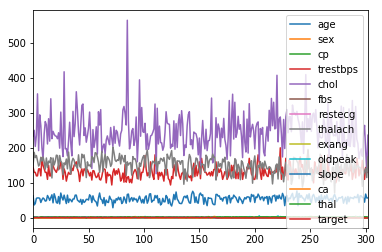

In [7]:
data.plot()

In [8]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

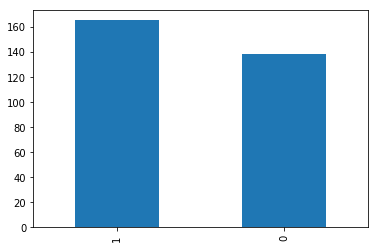

In [9]:
data.target.value_counts().plot(kind='bar')

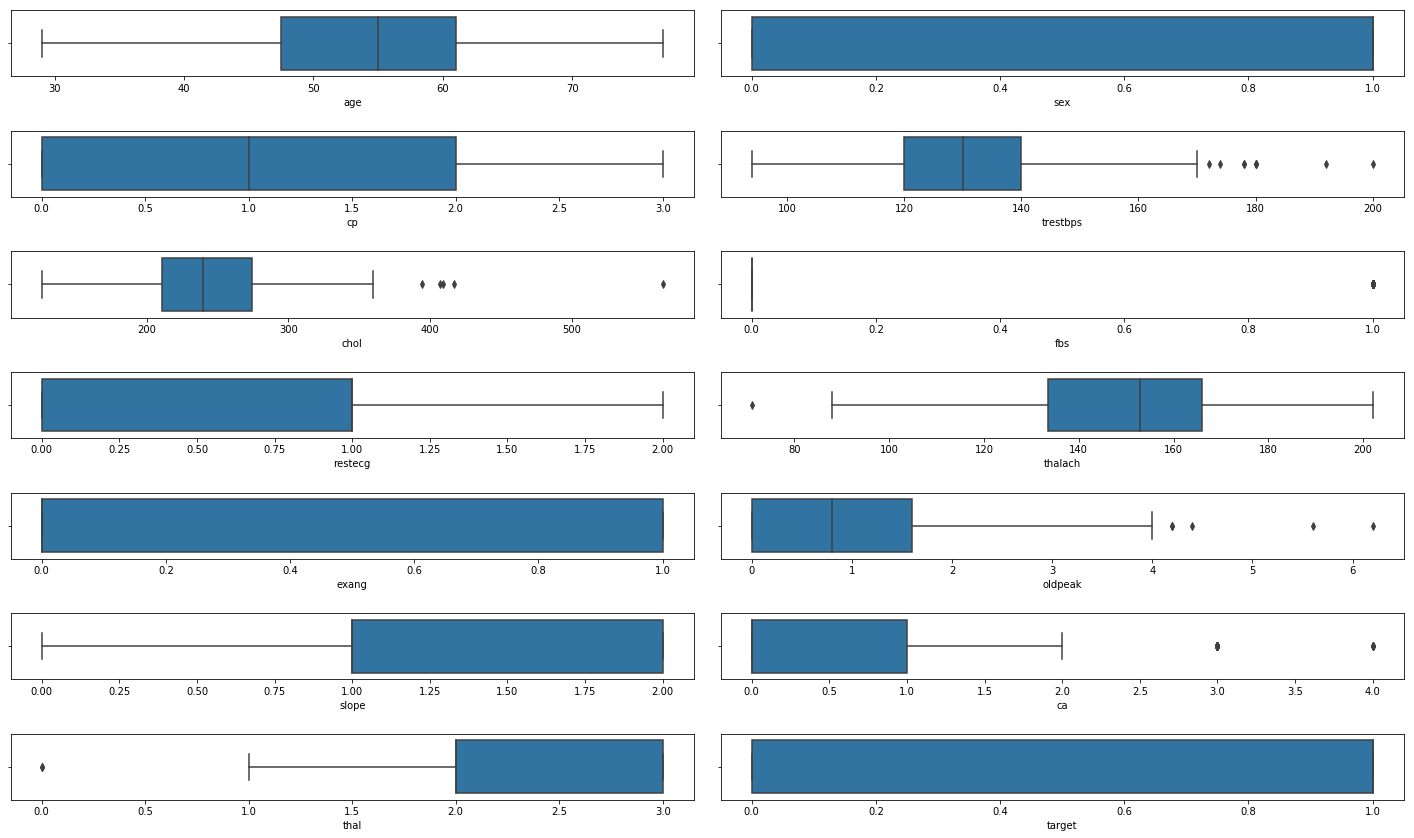

In [10]:
fig , ax = plt.subplots(nrows=7, ncols=2, figsize=(20,12))
for var,subplot in zip(data.columns, ax.flatten()):
    sns.boxplot(data[var], ax=subplot)
    plt.tight_layout(pad=2, h_pad=2)
    
plt.show()


<Figure size 2160x1440 with 0 Axes>

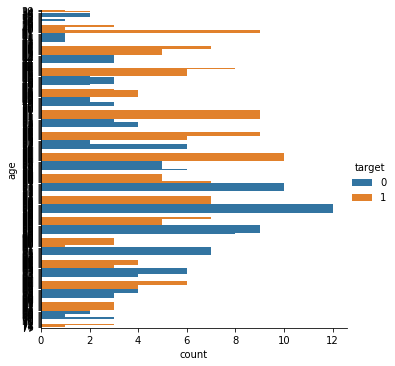

In [11]:
plt.figure(figsize=(30,20))
sns.catplot(kind='count', data=data, y='age', hue='target', order=data['age'].sort_values())
plt.show()

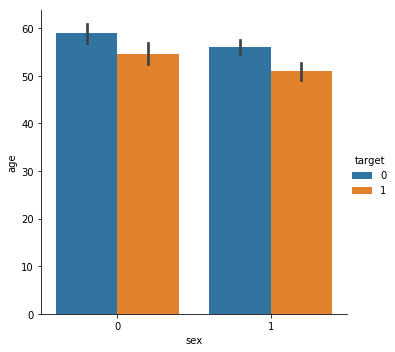

In [15]:
#plt.figure(figsize=(30,20))
sns.catplot(kind='bar', data=data, y='age',x='sex', hue='target')
plt.show()

## Split Data

In [16]:
X = data.drop('target', axis=1)
y = data['target'] 

In [17]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.20, random_state=42)

In [23]:
xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [24]:
ytrain.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [22]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytrain.shape)

(242, 13)
(242,)
(61, 13)
(242,)


In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
ss = StandardScaler()


In [31]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [32]:
xtrain

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]])

In [33]:
xtest

array([[ 3.51938054e-01,  5.20416500e-01, -8.17224232e-01,
         6.92350698e-01,  6.70698758e-01, -5.45776823e-01,
        -8.61891607e-01, -1.43822060e+00,  1.28536917e+00,
        -3.99335669e-01, -4.85744493e-01,  7.31507170e-02,
        -2.00597821e+00],
       [ 5.85288285e-01,  5.20416500e-01,  2.00451227e+00,
         1.72875297e+00,  9.21953360e-01, -5.45776823e-01,
        -8.61891607e-01,  4.50638062e-01, -7.77986605e-01,
        -6.92823330e-01, -4.85744493e-01, -8.19288030e-01,
         9.42568077e-01],
       [ 3.51938054e-01,  5.20416500e-01,  1.06393343e+00,
         6.92350698e-01, -2.46998376e+00,  1.83225076e+00,
         1.16023870e+00,  1.01327681e+00, -7.77986605e-01,
        -6.92823330e-01,  1.07375098e+00,  7.31507170e-02,
         9.42568077e-01],
       [ 2.35262938e-01, -1.92153785e+00, -8.17224232e-01,
        -1.36771119e-01,  3.45543726e+00, -5.45776823e-01,
        -8.61891607e-01,  8.89417229e-02,  1.28536917e+00,
         5.54499228e-01, -4.85744493e

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(xtrain,ytrain)
dt_train_pred = dt_clf.predict(xtrain)
dt_pred = dt_clf.predict(xtest)
dt_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [39]:
dt_train_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [41]:
train_accuracy = accuracy_score(dt_train_pred, ytrain)
train_accuracy


1.0

In [37]:
dt_accuracy = accuracy_score(dt_pred, ytest)
dt_accuracy

0.8360655737704918

In [42]:
from sklearn import tree

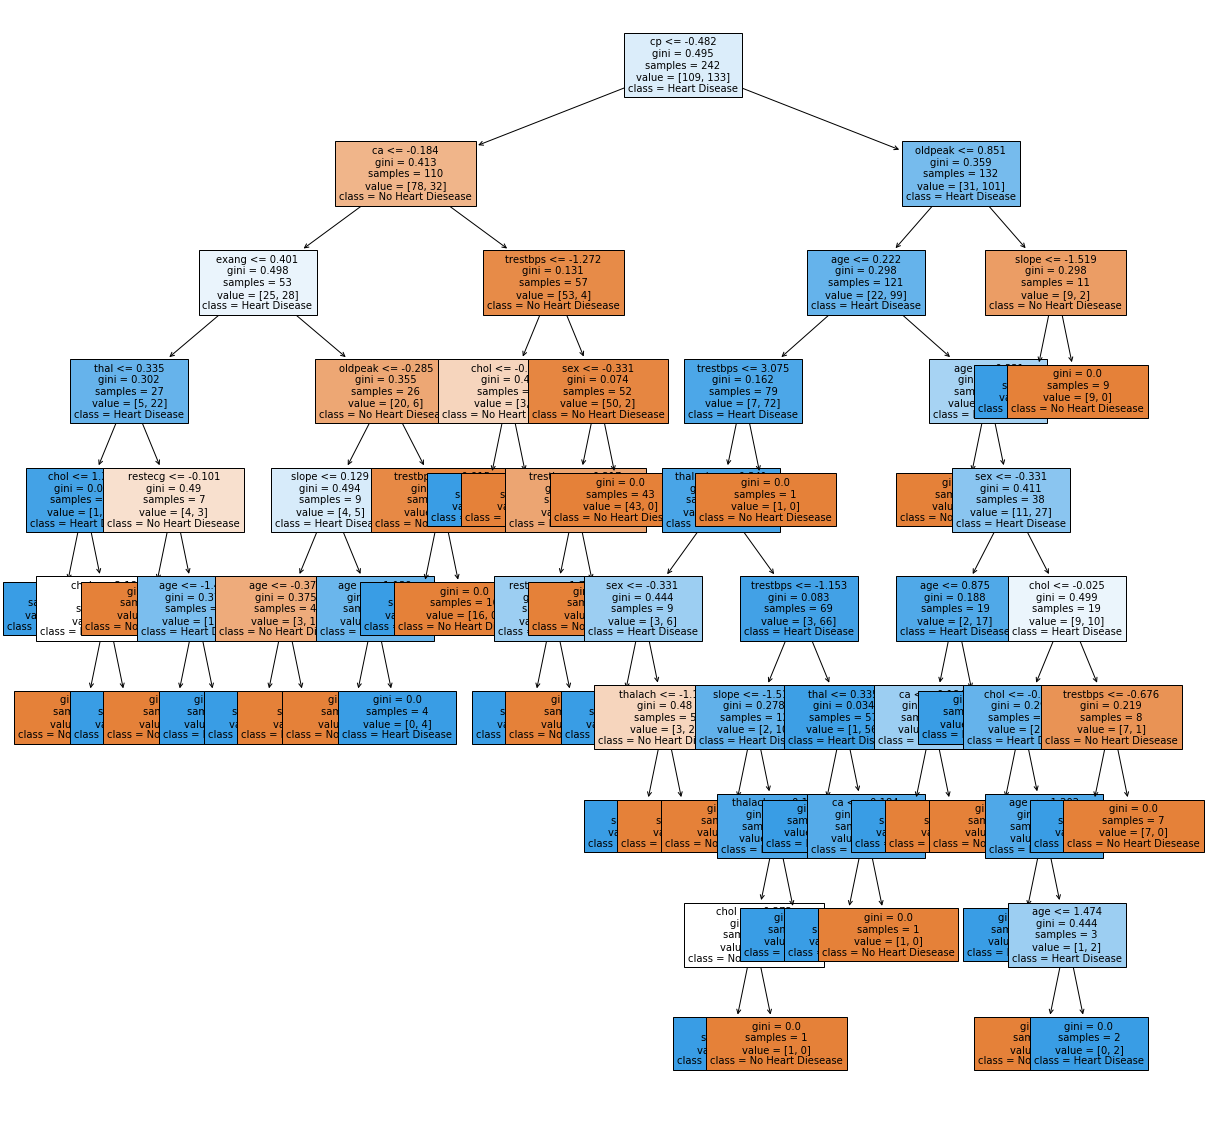

In [47]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['No Heart Diesease','Heart Disease']
tree.plot_tree(dt_clf, feature_names= features, class_names= classes,filled=True, fontsize=10)
plt.show()

In [48]:
dt_train_cm = confusion_matrix(dt_train_pred,ytrain)
dt_train_cm

array([[109,   0],
       [  0, 133]])

In [49]:
dt_cm = confusion_matrix(dt_pred, ytest)
dt_cm

array([[26,  7],
       [ 3, 25]])

In [55]:
def plot_cm(pred, actual, dom):
    cf = confusion_matrix(pred, actual)
    sns.heatmap(cf, annot=True, yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

    
    

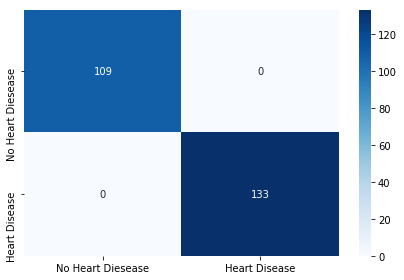

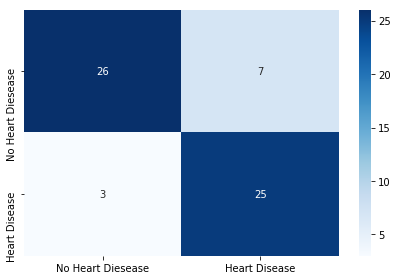

In [64]:
plot_cm(dt_train_pred, ytrain,dom= "train")

plot_cm(dt_pred, ytest,dom= "Test")

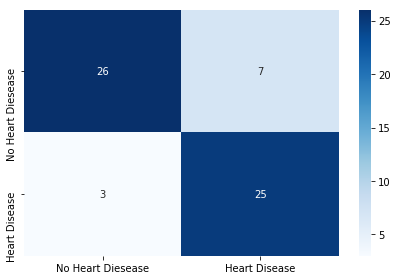

## Selection of best parameters

In [62]:
parameters = {'max_depth': [2,4,6,8,10],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [1,2]
             }
clf = DecisionTreeClassifier(random_state = 10)
gcv = GridSearchCV(clf, param_grid=parameters)
gcv.fit(xtrain, ytrain)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                     

In [63]:
gcv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [65]:
dt_clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=1, min_samples_split=2,random_state=10)
dt_clf.fit(xtrain,ytrain)
dt_train_pred = dt_clf.predict(xtrain)
dt_pred = dt_clf.predict(xtest)
dt_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

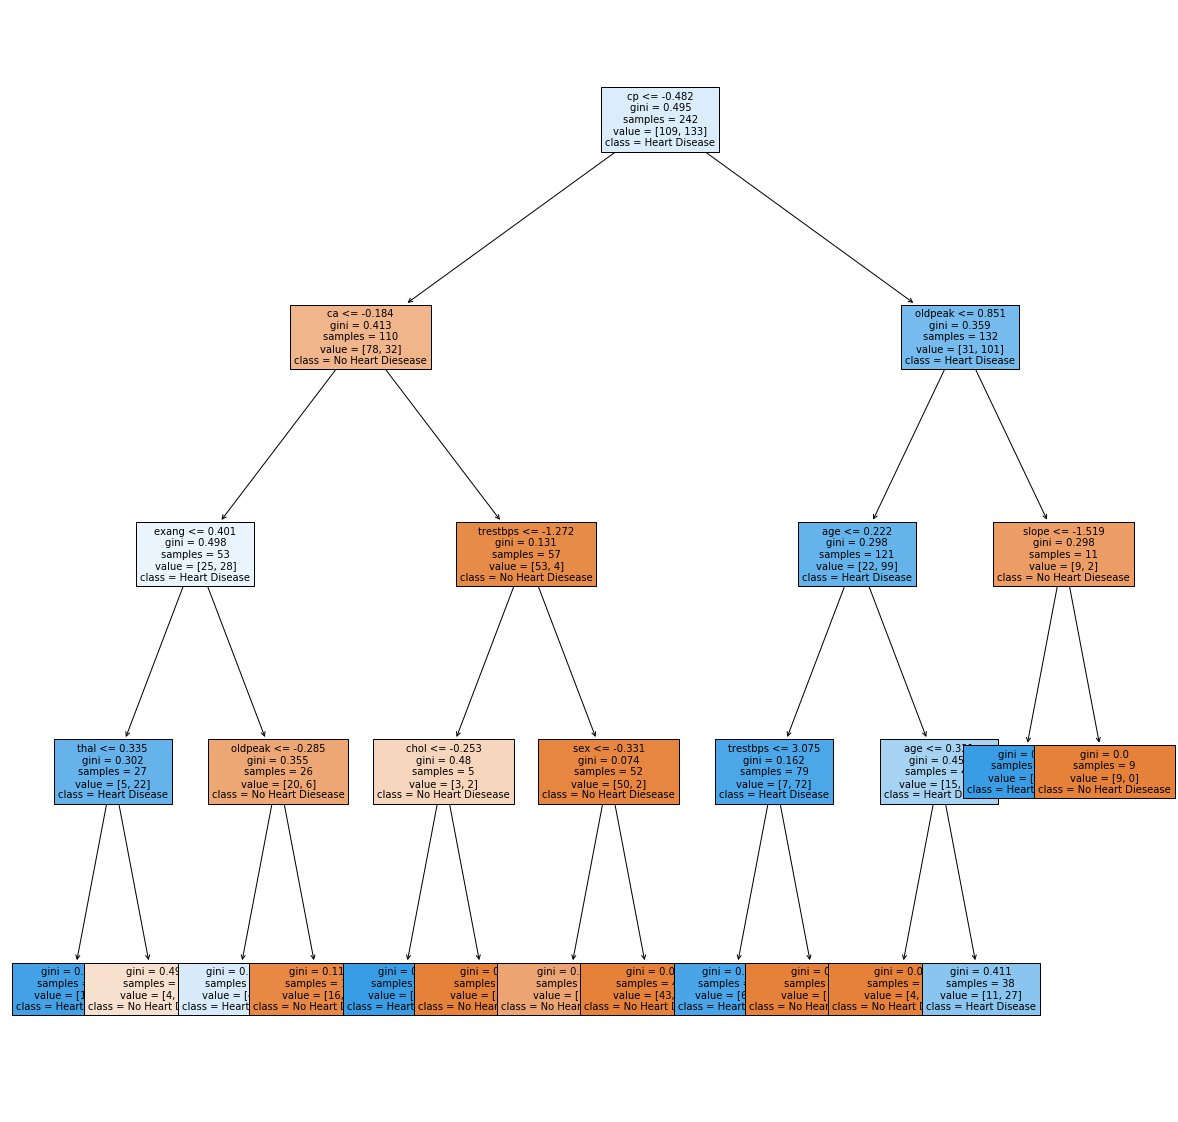

In [66]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['No Heart Diesease','Heart Disease']
tree.plot_tree(dt_clf, feature_names= features, class_names= classes,filled=True, fontsize=10)
plt.show()

In [67]:
dt_train_cm = confusion_matrix(dt_train_pred,ytrain)
dt_train_cm

array([[ 87,   6],
       [ 22, 127]])

In [68]:
dt_cm = confusion_matrix(dt_pred, ytest)
dt_cm

array([[25,  3],
       [ 4, 29]])

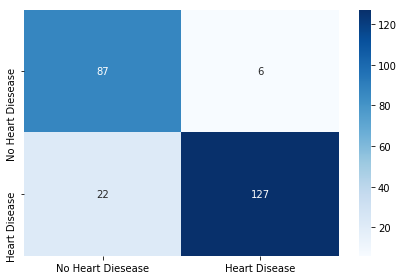

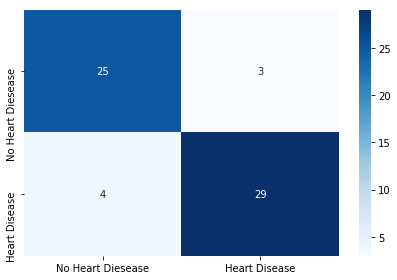

In [69]:
plot_cm(dt_train_pred, ytrain,dom= "train")

plot_cm(dt_pred, ytest,dom= "Test")

In [70]:
train_accuracy = accuracy_score(dt_train_pred, ytrain)
train_accuracy

0.8842975206611571

In [71]:
dt_accuracy = accuracy_score(dt_pred, ytest)
dt_accuracy

0.8852459016393442

In [72]:
path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(ccp_alphas)

[0.         0.00303737 0.00695277 0.0074224  0.01165114 0.01199988
 0.01352367 0.01509973 0.01634212 0.03374656 0.03733957 0.04763689
 0.11152358]


In [73]:
ccfs = []

for val in ccp_alphas:
    clf= DecisionTreeClassifier(random_state=0, ccp_alpha=val)
    clf.fit(xtrain, ytrain)
    ccfs.append(clf)
    

In [74]:
ccfs

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.003037366673730321, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.006952771049433898, class_weight=None,
                        criterion='gini', max_